أدخل عدد العمليات: 5
وقت الوصول للعملية P1: 1
وقت التنفيذ (Burst Time) للعملية P1: 2
وقت الوصول للعملية P2: 2
وقت التنفيذ (Burst Time) للعملية P2: 3
وقت الوصول للعملية P3: 5
وقت التنفيذ (Burst Time) للعملية P3: 9
وقت الوصول للعملية P4: 4
وقت التنفيذ (Burst Time) للعملية P4: 7
وقت الوصول للعملية P5: 4
وقت التنفيذ (Burst Time) للعملية P5: 4


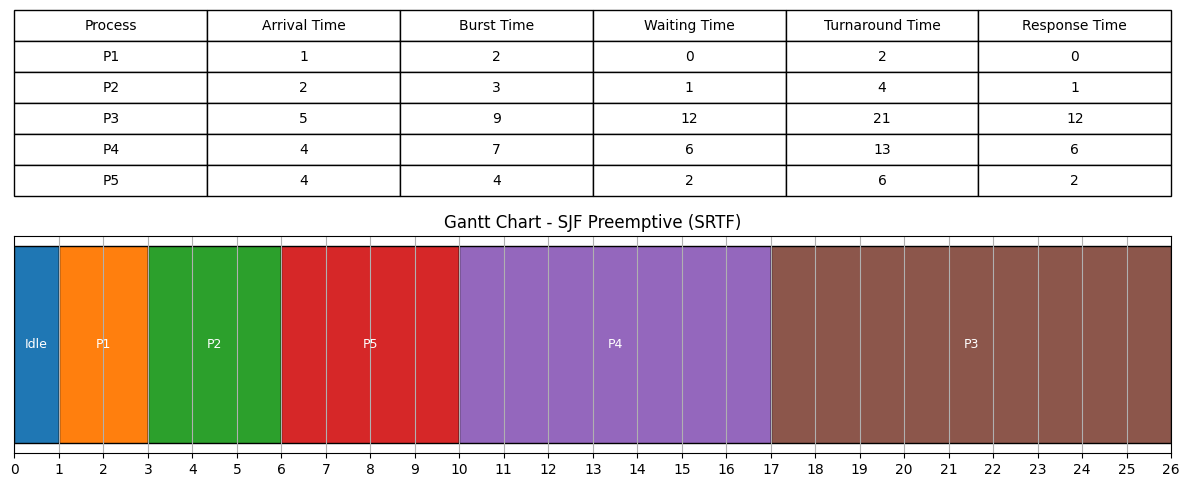

In [9]:
import matplotlib.pyplot as plt

# إدخال عدد العمليات
n = int(input("أدخل عدد العمليات: "))

# إدخال أوقات الوصول والتنفيذ
processes = [f'P{i+1}' for i in range(n)]
arrival_time = []
burst_time = []

for i in range(n):
    at = int(input(f"وقت الوصول للعملية {processes[i]}: "))
    bt = int(input(f"وقت التنفيذ (Burst Time) للعملية {processes[i]}: "))
    arrival_time.append(at)
    burst_time.append(bt)

# === حساب الأوقات ===
def find_times(n, at, bt):
    rt = bt.copy()
    wt = [0] * n
    tat = [0] * n
    rt_time = [-1] * n  # وقت الاستجابة
    complete = 0
    t = 0
    minm = float('inf')
    shortest = 0
    check = False

    while complete != n:
        for j in range(n):
            if at[j] <= t and rt[j] < minm and rt[j] > 0:
                minm = rt[j]
                shortest = j
                check = True

        if not check:
            t += 1
            continue

        # حساب وقت الاستجابة أول مرة فقط
        if rt_time[shortest] == -1:
            rt_time[shortest] = t - at[shortest]

        rt[shortest] -= 1
        minm = rt[shortest]
        if minm == 0:
            minm = float('inf')

        if rt[shortest] == 0:
            complete += 1
            check = False
            finish_time = t + 1
            wt[shortest] = finish_time - bt[shortest] - at[shortest]
            if wt[shortest] < 0:
                wt[shortest] = 0

        t += 1

    for i in range(n):
        tat[i] = bt[i] + wt[i]

    return wt, tat, rt_time

# === توليد مخطط جانت ===
def srtf_schedule(at, bt):
    n = len(bt)
    rt = bt.copy()
    complete = 0
    t = 0
    gantt_chart = []
    minm = float('inf')
    shortest = 0
    check = False

    while complete != n:
        for j in range(n):
            if at[j] <= t and rt[j] < minm and rt[j] > 0:
                minm = rt[j]
                shortest = j
                check = True

        if not check:
            gantt_chart.append("Idle")
            t += 1
            continue

        rt[shortest] -= 1
        gantt_chart.append(f"P{shortest + 1}")

        if rt[shortest] == 0:
            complete += 1
            minm = float('inf')
            check = False

        t += 1

    return gantt_chart

# تنفيذ الحسابات
wt, tat, rt_time = find_times(n, arrival_time, burst_time)
gantt = srtf_schedule(arrival_time, burst_time)

# ضغط الفترات في مخطط جانت
compressed = []
if gantt:
    current = gantt[0]
    start = 0
    for i in range(1, len(gantt)):
        if gantt[i] != current:
            compressed.append((current, start, i))
            current = gantt[i]
            start = i
    compressed.append((current, start, len(gantt)))

# === الرسم ===
fig, axs = plt.subplots(2, 1, figsize=(12, 5), gridspec_kw={'height_ratios': [1, 2]})
axs[0].axis('off')
columns = ['Process', 'Arrival Time', 'Burst Time', 'Waiting Time', 'Turnaround Time', 'Response Time']
cell_text = [[processes[i], arrival_time[i], burst_time[i], wt[i], tat[i], rt_time[i]] for i in range(n)]
table = axs[0].table(cellText=cell_text, colLabels=columns, loc='center', cellLoc='center')
table.scale(1, 2)

for task, start, end in compressed:
    axs[1].barh(0, end - start, left=start, edgecolor='black')
    axs[1].text((start + end) / 2, 0, task, va='center', ha='center', color='white', fontsize=9)

axs[1].set_xlim(0, len(gantt))
axs[1].set_yticks([])
axs[1].set_xticks(range(len(gantt)+1))
axs[1].set_title('Gantt Chart - SJF Preemptive (SRTF)')
axs[1].grid(axis='x')
plt.tight_layout()
plt.show()

